
# FDI(Foreign Direct Investment) Analysis of Provinces in Vietnam 

## Hyug Her 


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.linalg as sl
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor





**Foreign Direct Investment (FDI)** is an investment made by a company located outside its own borders with the intention of establishing an owenership in management. The benefit of acquiring FDI is that it boosts the manufacturing and services sector and results in creating more jobs and reduce unemployment rates. In this criteria, Vietnam is one of the leading countries among ASEAN (Association of Southeast Asian Nations) that raised the largest amount of FDI this past few years. Our goal of this analysis report is to find out the factors that contribute in rasing FDI both positive and negaive ways.
In order to do so, we first came up with two main questions to answer.

- What are the important factors that contribute significantly on each local city in Vietnam in attracting **Foreign Direct Investment (FDI)**?
- After finding correlations between **FDI** and contributing factors, could we predict the future **FDI**?


# Top 5 Countries

In [6]:
fdi = pd.read_csv('/Users/edward/Documents/fdi_analysis/data/pivot.csv', header = 1)

year = fdi.columns[1:]


fdi = pd.melt(fdi, id_vars='Host Country', value_vars= year )
fdi['Host Country'] = fdi['Host Country'].str.lstrip()
fdi = fdi.rename(columns = {0:'Year', 'value':'FDI'})
fdi['FDI'] = fdi['FDI'].str.replace(' ','')
fdi['FDI'] = fdi['FDI'].astype(float)
# fdi['Year'] = fdi['Year'].astype(float)
fdi['FDI'] = fdi['FDI'].apply(abs)
fdi = fdi[fdi['Host Country']!='Grand Total']
fdi

,Host Country,variable,FDI
0,Brunei Darussalam,2010,625.4
1,Cambodia,2010,782.6
2,Indonesia,2010,13770.2
3,Lao PDR,2010,332.6
4,Malaysia,2010,9155.9
...,...,...,...
115,Myanmar,2020,2205.6
116,Philippines,2020,6585.6
117,Singapore,2020,90597.7
118,Thailand,2020,4848.9


In [7]:
fdi_mean = fdi.groupby('Host Country')['FDI'].mean()
top_5_values = pd.DataFrame(fdi_mean.sort_values(ascending = False)[:5])
top_5 = top_5_values.index
top_5_values

,FDI
Host Country,
Singapore,71156.872727
Indonesia,17845.700000
Viet Nam,11627.918182
Malaysia,9389.827273
Thailand,8596.390909


/var/folders/31/fsv6j6b57ds7zhss6nz0s1t80000gn/T/ipykernel_45383/3157084602.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdi_top5.rename(columns = {'variable' : 'Year'}, inplace = True)


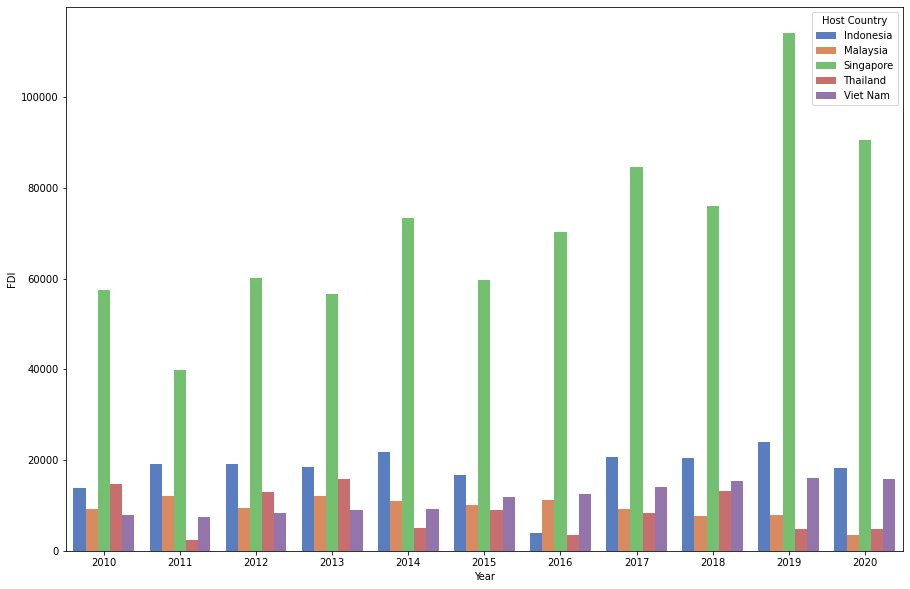

In [8]:
fdi_top5 = fdi[fdi['Host Country'].isin(top_5)]

fdi_top5.rename(columns = {'variable' : 'Year'}, inplace = True)

plt.figure(figsize=(15,10))
sns.barplot(x='Year',y='FDI', hue = 'Host Country', data = fdi_top5, palette = 'muted' )
plt.show()

In [9]:
fdi_top5 = fdi_top5[fdi_top5['Year'].isin(['2020', '2010'])]

fdi_top5 = fdi_top5.groupby(['Host Country','Year'])['FDI'].aggregate('first').unstack()

fdi_top5['change'] = fdi_top5['2020'] - fdi_top5['2010']

fdi_top5.sort_values('change') 

# fdi_top5.pivot_table(values=fdi_top5['FDI'], index = fdi_top5['Host Country'], columns='Year')#, aggfunc='first')

Year,2010,2020,change
Host Country,,,
Thailand,14746.7,4848.9,-9897.8
Malaysia,9155.9,3511.8,-5644.1
Indonesia,13770.2,18310.0,4539.8
Viet Nam,8000.0,15800.0,7800.0
Singapore,57460.6,90597.7,33137.1


# FDI by Province

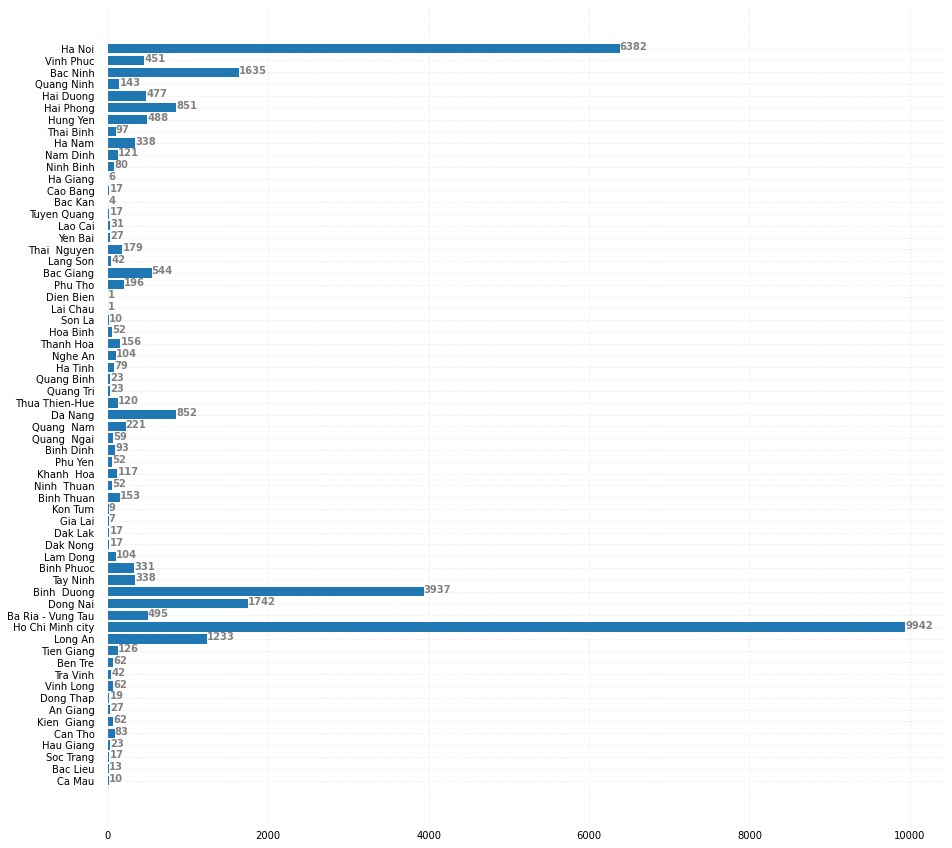

In [11]:
fdi_province = pd.read_excel('/Users/edward/Documents/fdi_analysis/data/FDI_projects.xlsx',engine='openpyxl')

n = ['South East','Mekong River Delta', 'Central Highlands', 'Red River Delta', 'Northern midlands and mountain areas',  'North Central area and Central coastal area' ]

fdi_province = fdi_province[~fdi_province['City'].isin(n)]
 
name = fdi_province['City']
projects = fdi_province['Number of projects']
 
# Figure Size
fig, ax = plt.subplots(figsize =(15, 15))
 
# Horizontal Bar Plot
ax.barh(name, projects)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('',
             loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15, '', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

In [12]:
fdi_province

,City,Number of projects
1,Ha Noi,6382
2,Vinh Phuc,451
3,Bac Ninh,1635
4,Quang Ninh,143
5,Hai Duong,477
...,...,...
64,Can Tho,83
65,Hau Giang,23
66,Soc Trang,17
67,Bac Lieu,13


If we see the graph above that shows the cumulative **FDI** investment of each cities, all 63 local cities in Vietnam have suceedded in acquiring **FDI** at least once ever since the opening of the economy in the 1980s.
However, we can also observe that most of the investment is heavily concentrated in specific cities.


In order to understand the cause of this gap between **FDI** of each city, we will construct a correlation analyze them by acquiring the data below.

- Economic indicators for each city in Vietnam (market size, population, labor force, etc.)
- **Government Competitiveness Index (PCI)** for each city in Vietnam

With this in mind, the features are FDI of each local government in Vietnam by adding other economic factors, including the **PCI index** of each local government.



# PCI Data

In [13]:

ENTRY_COST = pd.read_csv('/Users/edward/Documents/fdi_analysis/data/PCI/graph-of-entry-costs-ove.csv')

LAND_ACCESS = pd.read_csv('/Users/edward/Documents/fdi_analysis/data/PCI/graph-of-access-to-land.csv')

TRANSPARANCY = pd.read_csv('/Users/edward/Documents/fdi_analysis/data/PCI/graph-of-transparency-ov.csv')
                          
TIME_COST = pd.read_csv('/Users/edward/Documents/fdi_analysis/data/PCI/graph-of-time-costs-over.csv')
                          
INFORMAL_CHARGES = pd.read_csv('/Users/edward/Documents/fdi_analysis/data/PCI/graph-of-informal-charge.csv')
                          
PROACTIVITY = pd.read_csv('/Users/edward/Documents/fdi_analysis/data/PCI/graph-of-proactivity-ove.csv')
                          
BUSINESS_SUPPORT = pd.read_csv('/Users/edward/Documents/fdi_analysis/data/PCI/graph-of-business-suppor.csv')
                          
LABOR_POLICY = pd.read_csv('/Users/edward/Documents/fdi_analysis/data/PCI/graph-of-labor-policy-ov.csv')
                          
LAW = pd.read_csv('/Users/edward/Documents/fdi_analysis/data/PCI/graph-of-law-amp-order-o.csv')

dic = {}
ls = []
for i, year in enumerate(range(2006, 2021)):
    ls.append(year)
    dic[i] = year


**VCCI(Vietnam Chamber of Commerce)** and **USAID(United States Agency for International Development)** release the **Professional Competitiveness Index (PCI)**, a competitiveness index of each local government, every year.

In order to calculate the overall **PCI** score, a total of 9 sub-indexes are calculated by multiplying the weight of each index. 



**DATA Explanation**

**PCI** : Value calculated by applying weights to the following 10 data. It represents the competitiveness of each local government and is based on 100 points.


**ENTRY_COST** : Duration it takes a company to register and acquire all the licenses and permits it needs to start a business, obtain and receive land. It indicates the level of difficulty to satisfy the requirements. 

**LAND_ACCESS** : An indicator of how easy it is for companies to access land and how long tenure is guaranteed when land is acquired. (Vietnam government only provides 'a right to use' )

**TRANSPARANCY** : Whether a company has access to appropriate planning and legal documents necessary to run a business, and whether the documents are fairly available; Whether new policies and laws are communicated to companies and implemented predictably, and measures of the business effectiveness of the provincial web page.


**TIME_COST** : A measure of how often and for how long companies should be shut down and how much time they spend following administrative procedures when inspections are conducted by local regulators.

**INFORMAL_CHARGES** : Amount used informally outside of the business, measuring how much additional fees are burdensome for business operations, how much 'output' they can get from the payment, and whether local officials comply with regulations to collect rent from the business.

**PROACTIVITY** : A quantification of companies' evaluation of how actively and creatively local governments implement policies and legislate new policies to support private companies.

**BUSINESS_SUPPORT** : Promoting trade in the private sector, providing regulatory information to companies, matching business partners, and measuring technology services to companies.

**LABOR_POLICY** : A numerical representation of local governments' efforts to promote vocational training and technology development in local industries and to support the deployment of local workers.

**LAW** : A numerical measure of the trust of a company in a local legal institution, such as whether it regards a local government legal institution as a useful means of resolving disputes or trusting it as a means of appealing against corruption by public officials.


In [14]:

ENTRY_COST = ENTRY_COST.T
ENTRY_COST.rename(columns = dic, inplace = True)
ENTRY_COST = ENTRY_COST.iloc[1:,:]
ENTRY_COST = pd.melt(ENTRY_COST.reset_index(), id_vars=['index'], value_vars= ls)
ENTRY_COST.rename(columns = {'variable' : 'Year' , 'value' : 'ENTRY_COST' }, inplace = True)
ENTRY_COST.set_index('index', inplace = True)

LAND_ACCESS = LAND_ACCESS.T
LAND_ACCESS.rename(columns = dic, inplace = True)
LAND_ACCESS = LAND_ACCESS.iloc[1:,:]
LAND_ACCESS = pd.melt(LAND_ACCESS.reset_index(), id_vars=['index'], value_vars= ls)
LAND_ACCESS.rename(columns = {'variable' : 'Year' , 'value' : 'LAND_ACCESS' }, inplace = True)
LAND_ACCESS.set_index('index', inplace = True)

TRANSPARANCY = TRANSPARANCY.T
TRANSPARANCY.rename(columns = dic, inplace = True)
TRANSPARANCY = TRANSPARANCY.iloc[1:,:]
TRANSPARANCY = pd.melt(TRANSPARANCY.reset_index(), id_vars=['index'], value_vars= ls)
TRANSPARANCY.rename(columns = {'variable' : 'Year' , 'value' : 'TRANSPARANCY' }, inplace = True)
TRANSPARANCY.set_index('index', inplace = True)

TIME_COST = TIME_COST.T
TIME_COST.rename(columns = dic, inplace = True)
TIME_COST = TIME_COST.iloc[1:,:]
TIME_COST = pd.melt(TIME_COST.reset_index(), id_vars=['index'], value_vars= ls)
TIME_COST.rename(columns = {'variable' : 'Year' , 'value' : 'TIME_COST' }, inplace = True)
TIME_COST.set_index('index', inplace = True)

INFORMAL_CHARGES = INFORMAL_CHARGES.T
INFORMAL_CHARGES.rename(columns = dic, inplace = True)
INFORMAL_CHARGES = INFORMAL_CHARGES.iloc[1:,:]
INFORMAL_CHARGES = pd.melt(INFORMAL_CHARGES.reset_index(), id_vars=['index'], value_vars= ls)
INFORMAL_CHARGES.rename(columns = {'variable' : 'Year' , 'value' : 'INFORMAL_CHARGES' }, inplace = True)
INFORMAL_CHARGES.set_index('index', inplace = True)

PROACTIVITY = PROACTIVITY.T
PROACTIVITY.rename(columns = dic, inplace = True)
PROACTIVITY = PROACTIVITY.iloc[1:,:]
PROACTIVITY = pd.melt(PROACTIVITY.reset_index(), id_vars=['index'], value_vars= ls)
PROACTIVITY.rename(columns = {'variable' : 'Year' , 'value' : 'PROACTIVITY' }, inplace = True)
PROACTIVITY.set_index('index', inplace = True)

BUSINESS_SUPPORT = BUSINESS_SUPPORT.T
BUSINESS_SUPPORT.rename(columns = dic, inplace = True)
BUSINESS_SUPPORT = BUSINESS_SUPPORT.iloc[1:,:]
BUSINESS_SUPPORT = pd.melt(BUSINESS_SUPPORT.reset_index(), id_vars=['index'], value_vars= ls)
BUSINESS_SUPPORT.rename(columns = {'variable' : 'Year' , 'value' : 'BUSINESS_SUPPORT' }, inplace = True)
BUSINESS_SUPPORT.set_index('index', inplace = True)

LABOR_POLICY = LABOR_POLICY.T
LABOR_POLICY.rename(columns = dic, inplace = True)
LABOR_POLICY = LABOR_POLICY.iloc[1:,:]
LABOR_POLICY = pd.melt(LABOR_POLICY.reset_index(), id_vars=['index'], value_vars= ls)
LABOR_POLICY.rename(columns = {'variable' : 'Year' , 'value' : 'LABOR_POLICY' }, inplace = True)
LABOR_POLICY.set_index('index', inplace = True)

LAW = LAW.T
LAW.rename(columns = dic, inplace = True)
LAW = LAW.iloc[1:,:]
LAW = pd.melt(LAW.reset_index(), id_vars=['index'], value_vars= ls)
LAW.rename(columns = {'variable' : 'Year' , 'value' : 'LAW' }, inplace = True)
LAW.set_index('index', inplace = True)


In [15]:
df = pd.concat((ENTRY_COST, LAND_ACCESS['LAND_ACCESS'], TRANSPARANCY['TRANSPARANCY'], TIME_COST['TIME_COST'], INFORMAL_CHARGES['INFORMAL_CHARGES'], PROACTIVITY['PROACTIVITY'], BUSINESS_SUPPORT['BUSINESS_SUPPORT'], LABOR_POLICY['LABOR_POLICY'], LAW['LAW']), axis = 1)
df = df[df['Year'].isin(range(2010,2021))]


In [16]:
# Weight of each variable
W_Entry_Costs = 5
W_Land_Access = 5
W_Transparency = 20
W_Time_Cost = 5
W_Informal_Charges = 10
W_Proactivity = 5
W_Business = 20
W_Labor = 20
W_Legal = 5


In [17]:
df['ENTRY_COST'] = df['ENTRY_COST'] * W_Entry_Costs/10
df['LAND_ACCESS'] = df['LAND_ACCESS'] * W_Land_Access/10
df['TRANSPARANCY'] = df['TRANSPARANCY'] * W_Transparency/10
df['TIME_COST'] = df['TIME_COST'] * W_Time_Cost/10
df['INFORMAL_CHARGES'] = df['INFORMAL_CHARGES'] * W_Informal_Charges/10
df['PROACTIVITY'] = df['PROACTIVITY'] * W_Proactivity/10
df['BUSINESS_SUPPORT'] = df['BUSINESS_SUPPORT'] * W_Business/10
df['LABOR_POLICY'] = df['LABOR_POLICY'] * W_Labor/10
df['LAW'] = df['LAW'] * W_Legal/10


In [18]:
df['PCI INDEX'] = df.iloc[:,1:].sum(axis = 1)

In [19]:
df.reset_index(inplace = True)
df.rename(columns = {'index':'Province'}, inplace = True)
df.head()

,Province,Year,ENTRY_COST,LAND_ACCESS,TRANSPARANCY,TIME_COST,INFORMAL_CHARGES,PROACTIVITY,BUSINESS_SUPPORT,LABOR_POLICY,LAW,PCI INDEX
0,An Giang,2010,3.460,3.820,12.68,3.165,6.24,3.495,10.28,10.98,2.240,56.360
1,Bac Giang,2010,3.220,2.400,12.22,2.915,6.43,2.750,12.60,10.72,2.425,55.680
2,Bac Kan,2010,3.140,3.165,10.54,2.805,4.86,2.280,10.46,9.30,1.755,48.305
3,Cao Bang,2010,3.735,2.255,10.34,2.765,5.83,2.330,9.24,11.02,1.355,48.870
4,Bac Lieu,2010,3.135,3.815,9.74,3.145,7.72,3.050,10.38,10.00,2.505,53.490


# 3) The 10-year Market size, population , and labor quality data of 63 local governments in Vietnam.

**MKS (Market Size)** : Goods and Services distributed in each city
retail prices(USD). The size of each region's market is shown through the size of the funds.

**POP (Population)** : The total population of each city. In general, the population is closely related to the market size, labor force, and the degree of development of various infrastructures.

**LAQT (Labor Quality)** : Percentage of the trained working population in each city (percentage of senior personnel)


In [22]:
# Maket size, population, labor quality of 63 Vietnam local government 
path = '/Users/edward/Documents/fdi_analysis/data/'

Viet_MKS = pd.read_csv(path + "Marketsize.csv", sep=",")

Viet_LAQU = pd.read_csv(path + "Labor_quality.csv", sep=" ")

Viet_POP = pd.read_csv(path + "Population_and_Employment.csv", sep=",")

Viet_POP.dropna(axis=0, inplace=True)


In [23]:
Viet_MKS_mt = pd.melt(Viet_MKS, id_vars=['Cities, provincies'], value_vars=["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"])
Viet_MKS_mt.rename(columns={"variable" : "Year", "value" : "MKS_value"}, inplace=True)


Viet_LAQU_mt = pd.melt(Viet_LAQU, id_vars=['Cities, provincies'], value_vars=["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"])
Viet_LAQU_mt.rename(columns={"variable" : "Year", "value" : "LAQU_value"}, inplace=True)

Viet_POP1 = Viet_POP.iloc[:, 0:12]
Viet_POP1.rename(columns={"Total 2010" : "2010", "Total 2011":"2011", "Total 2012" : "2012", "Total 2013" : "2013", "Total 2014" : "2014", "Total 2015": "2015", "Total 2016" : "2016" , "Total 2017" : "2017", "Total 2018" : "2018", "Total 2019" : "2019", "Total 2020" : "2020" }, inplace=True)
Viet_POP1_mt = pd.melt(Viet_POP1, id_vars=['Cities, provincies'], value_vars=["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"])

Viet_POP1_mt.rename(columns={"variable" : "Year", "value" : "POP_value"}, inplace=True)


df2 = Viet_MKS_mt.merge(Viet_LAQU_mt, how="inner")
df2 = df2.merge(Viet_POP1_mt, how="inner")

df2.rename(columns = {'Cities, provincies' : 'Province'}, inplace = True)



In [24]:
df['Year'] = df['Year'].astype(str)
df2['Year'] = df2['Year'].astype(str)
final = pd.merge(df, df2, how = 'inner', on = ['Province', 'Year'] )

In [25]:
final = pd.merge(df, df2, how = 'inner', on = ['Province', 'Year'] )

In [26]:
final.head()

,Province,Year,ENTRY_COST,LAND_ACCESS,TRANSPARANCY,TIME_COST,INFORMAL_CHARGES,PROACTIVITY,BUSINESS_SUPPORT,LABOR_POLICY,LAW,PCI INDEX,MKS_value,LAQU_value,POP_value
0,An Giang,2010,3.460,3.820,12.68,3.165,6.24,3.495,10.28,10.98,2.240,56.360,51086.9,1240.0,2122.44
1,Bac Giang,2010,3.220,2.400,12.22,2.915,6.43,2.750,12.60,10.72,2.425,55.680,7316.9,984.8,1569.14
2,Bac Kan,2010,3.140,3.165,10.54,2.805,4.86,2.280,10.46,9.30,1.755,48.305,1832.5,194.5,296.62
3,Cao Bang,2010,3.735,2.255,10.34,2.765,5.83,2.330,9.24,11.02,1.355,48.870,4007.4,337.2,512.54
4,Bac Lieu,2010,3.135,3.815,9.74,3.145,7.72,3.050,10.38,10.00,2.505,53.490,13982.7,483.9,861.84


# 4) 10-year FDI flow data from 63 local governments in Vietnam

In [27]:
FDI = pd.read_csv('/Users/edward/Documents/fdi_analysis/data/Yearly_FID_by_province.csv')
FDI['Province'] = FDI['Province'].str.strip()
for i in range(2010,2021):
    i = str(i)
    FDI[i] = FDI[i].str.replace(',','.')
    FDI[i] = FDI[i].astype(float)
FDI = FDI.fillna(0)

Year = [str(i) for i in range(2010,2021)]

FDI = FDI.melt(id_vars = ['Province'], value_vars = Year)
FDI.rename(columns = {'variable' : 'Year', 'value' : 'FDI'}, inplace = True)
FDI.head()

,Province,Year,FDI
0,Ha Noi,2010,557.4
1,Vinh Phuc,2010,248.1
2,Bac Ninh,2010,285.3
3,Quang Ninh,2010,2213.7
4,Hai Duong,2010,166.4


In [28]:
final = pd.merge(final, FDI , how = 'left', on = ['Province', 'Year'] )
final

,Province,Year,ENTRY_COST,LAND_ACCESS,TRANSPARANCY,TIME_COST,INFORMAL_CHARGES,PROACTIVITY,BUSINESS_SUPPORT,LABOR_POLICY,LAW,PCI INDEX,MKS_value,LAQU_value,POP_value,FDI
0,An Giang,2010,3.460,3.820,12.68,3.165,6.24,3.495,10.28,10.98,2.240,56.360,51086.90,1240.00,2122.44,65.4
1,Bac Giang,2010,3.220,2.400,12.22,2.915,6.43,2.750,12.60,10.72,2.425,55.680,7316.90,984.80,1569.14,163.1
2,Bac Kan,2010,3.140,3.165,10.54,2.805,4.86,2.280,10.46,9.30,1.755,48.305,1832.50,194.50,296.62,0.3
3,Cao Bang,2010,3.735,2.255,10.34,2.765,5.83,2.330,9.24,11.02,1.355,48.870,4007.40,337.20,512.54,0.0
4,Bac Lieu,2010,3.135,3.815,9.74,3.145,7.72,3.050,10.38,10.00,2.505,53.490,13982.70,483.90,861.84,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,Tien Giang,2020,4.115,3.345,11.46,3.785,6.56,2.910,13.58,10.98,2.995,59.730,73814.63,1112.13,1772.54,167.2
689,Tra Vinh,2020,4.305,3.805,11.44,4.380,7.48,3.405,9.74,10.48,3.530,58.565,29427.84,561.34,1009.94,84.1
690,TT-Hue,2020,3.545,3.165,12.72,4.035,6.97,3.260,11.00,13.04,3.495,61.230,40157.85,583.70,1133.71,42.2
691,Vinh Long,2020,4.050,3.575,12.22,4.165,7.71,3.450,14.44,13.22,3.275,66.105,54833.90,603.60,1022.97,239.8


# EDA (Visualization)

AxesSubplot(0.125,0.125;0.775x0.755)


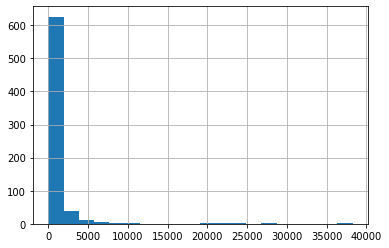

In [29]:
print(final['FDI'].hist(bins=20))

The distribution of total **FDI** is generally distributed below USD 20000.
As we saw in the intro, it may be cause by the fact that FDI is heavily concentrated in large cities.

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# scaler = StandardScaler() 
scaler = MinMaxScaler() 

cols = ['FDI','PCI INDEX','MKS_value','POP_value','LAQU_value','ENTRY_COST', 'LAND_ACCESS', 'TRANSPARANCY',
    'TIME_COST', 'INFORMAL_CHARGES','PROACTIVITY','BUSINESS_SUPPORT', 'LABOR_POLICY','LAW']

numerical_data = final[cols]

numerical_data = scaler.fit_transform(numerical_data)
numerical_data = pd.DataFrame(numerical_data, columns = cols)

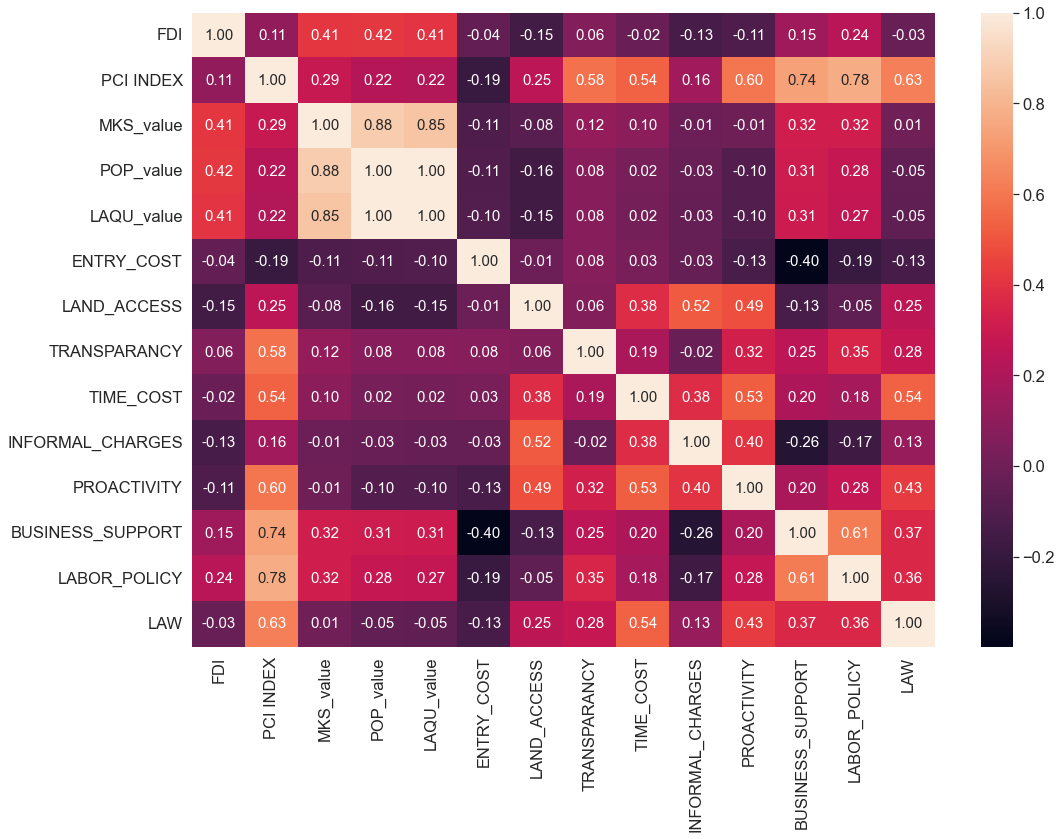

In [32]:

corr = numerical_data.corr(method = 'pearson')
fig = plt.figure(figsize = (16, 12))
ax = fig.gca()
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
                 annot=True,
                 fmt='.2f', 
                 annot_kws={'size': 15}, 
                 yticklabels=cols, 
                 xticklabels=cols, 
                 ax=ax)
plt.tight_layout() 
plt.show()


We created a correlation heatmap in order to interpret correlation between **FDI** and variables. If the correlation value is closer to -1 or 1, it indicates that strong correlation exists between two variables. 
According to the heatmap graph above, there are no factors that are extremely close to -1 or 1 in overall, but we can say that **MKS, POP, LAQU, PCI, BUSINESS_SUPPORT**, and **LABOR_POLICY** are the factors most correlated with the target variable **FDI**. 


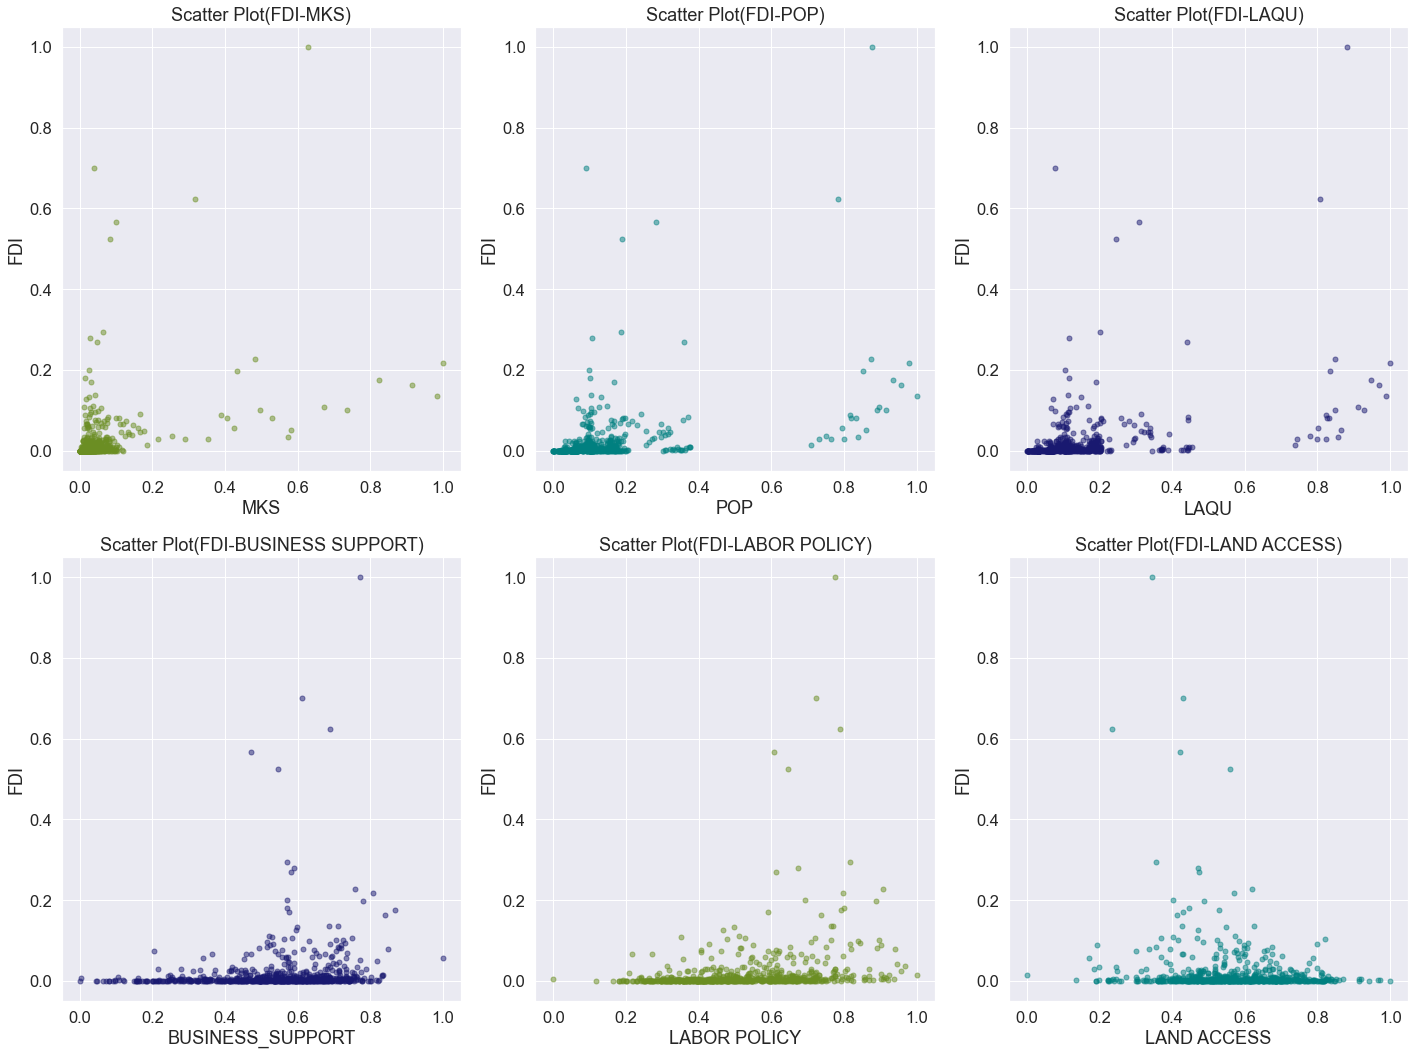

In [33]:

fig = plt.figure(figsize=(20,15))

# 1) MKS
plt.subplot(2,3,1)
plt.plot('MKS_value', 'FDI',
            data= numerical_data,
            linestyle='none',
            marker='o', 
            markersize=5,
            color='olivedrab',
            alpha=0.5)
plt.title('Scatter Plot(FDI-MKS)')
plt.xlabel('MKS')
plt.ylabel('FDI')


# 2) POP
plt.subplot(2,3,2)
plt.plot('POP_value', 'FDI',
            data=numerical_data,
            linestyle='none',
            marker='o', 
            markersize=5,
            color='teal',
            alpha=0.5)
plt.title('Scatter Plot(FDI-POP)')
plt.xlabel('POP')
plt.ylabel('FDI')


# 3) LAQU
plt.subplot(2,3,3)
plt.plot('LAQU_value', 'FDI',
            data=numerical_data,
            linestyle='none',
            marker='o', 
            markersize=5,
            color='midnightblue',
            alpha=0.5)
plt.title('Scatter Plot(FDI-LAQU)')
plt.xlabel('LAQU')
plt.ylabel('FDI')
# plt.show()



# 4) BUSINESS SUPPORT
plt.subplot(2,3,4)
plt.plot('BUSINESS_SUPPORT', 'FDI',
            data=numerical_data,
            linestyle='none',
            marker='o', 
            markersize=5,
            color='midnightblue',
            alpha=0.5)

plt.title('Scatter Plot(FDI-BUSINESS SUPPORT)')
plt.xlabel('BUSINESS_SUPPORT')
plt.ylabel('FDI')


# 5) LABOR POLICY
plt.subplot(2,3,5)
plt.plot('LABOR_POLICY', 'FDI',
            data=numerical_data,
            linestyle='none',
            marker='o', 
            markersize=5,
            color='olivedrab',
            alpha=0.5)
plt.title('Scatter Plot(FDI-LABOR POLICY)')
plt.xlabel('LABOR POLICY')
plt.ylabel('FDI')

# 6) LAND ACCESS
plt.subplot(2,3,6)
plt.plot('LAND_ACCESS', 'FDI',
            data=numerical_data,
            linestyle='none',
            marker='o', 
            markersize=5,
            color='teal',
            alpha=0.5)
plt.title('Scatter Plot(FDI-LAND ACCESS)')
plt.xlabel('LAND ACCESS')
plt.ylabel('FDI')

plt.tight_layout()
plt.show()


All 6 features that showed the highest correlation among all factors show some positive and negative relationship with **FDI** in these scatter plots, but it is difficult to say that high correlation exists between the variables.

In [34]:
X = numerical_data.iloc[:, 1:]
y = numerical_data.iloc[:, 1]
X

,PCI INDEX,MKS_value,POP_value,LAQU_value,ENTRY_COST,LAND_ACCESS,TRANSPARANCY,TIME_COST,INFORMAL_CHARGES,PROACTIVITY,BUSINESS_SUPPORT,LABOR_POLICY,LAW
0,0.544563,0.046934,0.204437,0.225737,0.408389,0.793103,0.735113,0.470785,0.559543,0.700876,0.484286,0.464220,0.392405
1,0.524054,0.005473,0.142484,0.170636,0.302428,0.303448,0.687885,0.387312,0.590538,0.514393,0.650000,0.440367,0.450949
2,0.301614,0.000277,0.000000,0.000000,0.267108,0.567241,0.515400,0.350584,0.334421,0.396746,0.497143,0.310092,0.238924
3,0.318655,0.002338,0.024177,0.030811,0.529801,0.253448,0.494867,0.337229,0.492659,0.409262,0.410000,0.467890,0.112342
4,0.458000,0.011787,0.063288,0.062485,0.264901,0.791379,0.433265,0.464107,0.800979,0.589487,0.491429,0.374312,0.476266
...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,0.646207,0.068463,0.165258,0.198128,0.697572,0.629310,0.609856,0.677796,0.611746,0.554443,0.720000,0.464220,0.631329
689,0.611069,0.026417,0.079870,0.079205,0.781457,0.787931,0.607803,0.876461,0.761827,0.678348,0.445714,0.418349,0.800633
690,0.691449,0.036581,0.093729,0.084033,0.445916,0.567241,0.739220,0.761269,0.678630,0.642053,0.535714,0.653211,0.789557
691,0.838486,0.050483,0.081329,0.088330,0.668874,0.708621,0.687885,0.804674,0.799347,0.689612,0.781429,0.669725,0.719937


# Linear Regression

In [49]:
scale_columns = ["PCI INDEX", "MKS_value","POP_value", "LAQU_value", "ENTRY_COST",  
                 "LAND_ACCESS", "TRANSPARANCY", "TIME_COST", "INFORMAL_CHARGES", 
                 "PROACTIVITY", "BUSINESS_SUPPORT" , "LABOR_POLICY", "LAW"]

scaler = StandardScaler()

final[scale_columns] = scaler.fit_transform(final[scale_columns])
final.head()

,Province,Year,ENTRY_COST,LAND_ACCESS,TRANSPARANCY,TIME_COST,INFORMAL_CHARGES,PROACTIVITY,BUSINESS_SUPPORT,LABOR_POLICY,LAW,PCI INDEX,MKS_value,LAQU_value,POP_value,FDI
0,An Giang,2010,-1.204652,1.575305,0.490889,-0.303806,0.245293,1.454487,-0.304626,-0.347879,-1.049988,-0.049277,-0.016861,0.546687,0.500089,65.4
1,Bac Giang,2010,-1.790596,-1.860601,0.101815,-0.832236,0.429841,0.154209,0.710684,-0.489703,-0.720488,-0.187068,-0.428526,0.185225,0.079415,163.1
2,Bac Kan,2010,-1.985910,-0.009567,-1.319150,-1.064746,-1.095108,-0.666100,-0.225852,-1.264284,-1.913810,-1.681491,-0.480107,-0.934148,-0.888081,0.3
3,Cao Bang,2010,-0.533258,-2.211450,-1.488313,-1.149295,-0.152942,-0.578833,-0.759765,-0.326060,-2.626241,-1.567003,-0.459652,-0.732029,-0.723917,0.0
4,Bac Lieu,2010,-1.998118,1.563207,-1.995800,-0.346080,1.682824,0.677811,-0.260862,-0.882448,-0.578002,-0.630835,-0.365833,-0.524245,-0.458345,0.2


In [50]:
X = final.iloc[:,2:-1]
y = final["FDI"]

In [128]:
# Select Meaningful Features
features = corr.iloc[1:,0].map(abs).sort_values(ascending=False)[:8]
features


POP_value           0.415858
MKS_value           0.412747
LAQU_value          0.409617
LABOR_POLICY        0.236010
BUSINESS_SUPPORT    0.152541
LAND_ACCESS         0.150314
INFORMAL_CHARGES    0.134174
PROACTIVITY         0.112661
Name: FDI, dtype: float64

In [129]:
regression = LinearRegression()
regression.fit(X[features.index], y)
coeff = pd.DataFrame(regression.coef_, index=features.index)
coeff

,0
POP_value,-244.873087
MKS_value,619.638238
LAQU_value,682.128891
LABOR_POLICY,471.138744
BUSINESS_SUPPORT,-238.098009
LAND_ACCESS,-81.296102
INFORMAL_CHARGES,-180.491479
PROACTIVITY,-217.564195


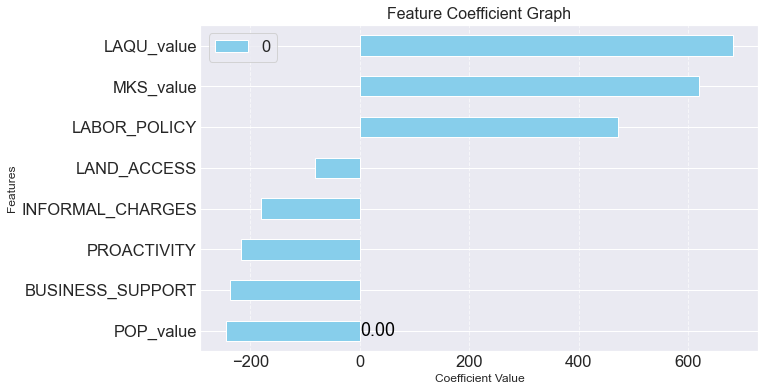

In [131]:
import pandas as pd
import matplotlib.pyplot as plt

coeff = coeff.sort_values(by=0)

# Setting up color mapping for positive and negative coefficients
colors = ['skyblue' if c >= 0 else 'lightcoral' for c in coeff]

# Plotting the horizontal bar plot
ax = coeff.plot.barh(color=colors, figsize=(10, 6))

# Displaying the actual numerical values on the bars
for index, value in enumerate(coeff):
    ax.text(value, index, f'{value:.2f}', ha='left' if value >= 0 else 'right', va='center', color='black')

# Customizing the plot
ax.set_title('Feature Coefficient Graph', fontsize=16)
ax.set_xlabel('Coefficient Value', fontsize=12)
ax.set_ylabel('Features', fontsize=12)
ax.tick_params(axis='both', which='both', length=0)  # Remove tick marks for a cleaner look
ax.grid(axis='x', linestyle='--', alpha=0.6)  # Adding a horizontal grid for reference

# Show the plot
plt.show()


We could see that **MKS, LAQU, LABOR POLICY** had highest positive values. This means that the cities with big market size, good labor quality and labor policy will suceeds in raising higher **FDI**.  

Furthermore, **Population, BUSINESS SUPPORT and PROACTIVITY** were the highest negative values. We could also interpret thist as a meaning that cities with high **Population, PROACTIVITY, and BUSINESS SUPPORT** have negative affects on raising **FDI**. 

However, this can be wrongful interpretation in some ways because usually cities with high population tends to have higher market size and this could be back up by our correlation heatmap table which shows high correlation between population and the market size of the city. 

In order to find the reason behind this, we checked multicollinearity between the features which could have caused a bias result.

In [132]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

/Users/edward/miniconda3/envs/hyug/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,ENTRY_COST,inf
1,LAND_ACCESS,inf
2,TRANSPARANCY,inf
3,TIME_COST,inf
4,INFORMAL_CHARGES,inf
5,PROACTIVITY,inf
6,BUSINESS_SUPPORT,inf
7,LABOR_POLICY,inf
8,LAW,inf
9,PCI INDEX,inf


When we checked the VIF values, we could see that extremely strong multicollinearity exists between the features. In order to compromise this problem, we decided to run a Ridge Regression which improves the regression model by giving a L2 penalty.

# Ridge Regression

<!-- βˆλ = (X0X + λIp)−1X0y -->

$$ \hat{\beta}_{\lambda} = (X'X) + \lambda I_{p})^{-1}X'y $$

In [133]:
def RidgeRegression(X, y, lamda = 5000, n_col = 14, alpha = 0.5):

    df = np.arange(n_col).reshape(1,-1) # I randomly assigned these number to stack different betas later on

    lamda = np.arange(1,lamda,alpha)
    
    for i in lamda:
        lamda = i
        x_t = np.transpose(X)
        x_trans_x = np.dot(x_t, X)

        identity_lambda = np.identity(x_trans_x.shape[0]) * lamda
        inv = np.linalg.inv(identity_lambda + x_trans_x)
        xtrans_y = np.dot(x_t, y)
        betas = np.dot(inv, xtrans_y)
        df = np.vstack((df, betas))
        
    df = pd.DataFrame(df[1:,:])
    return df

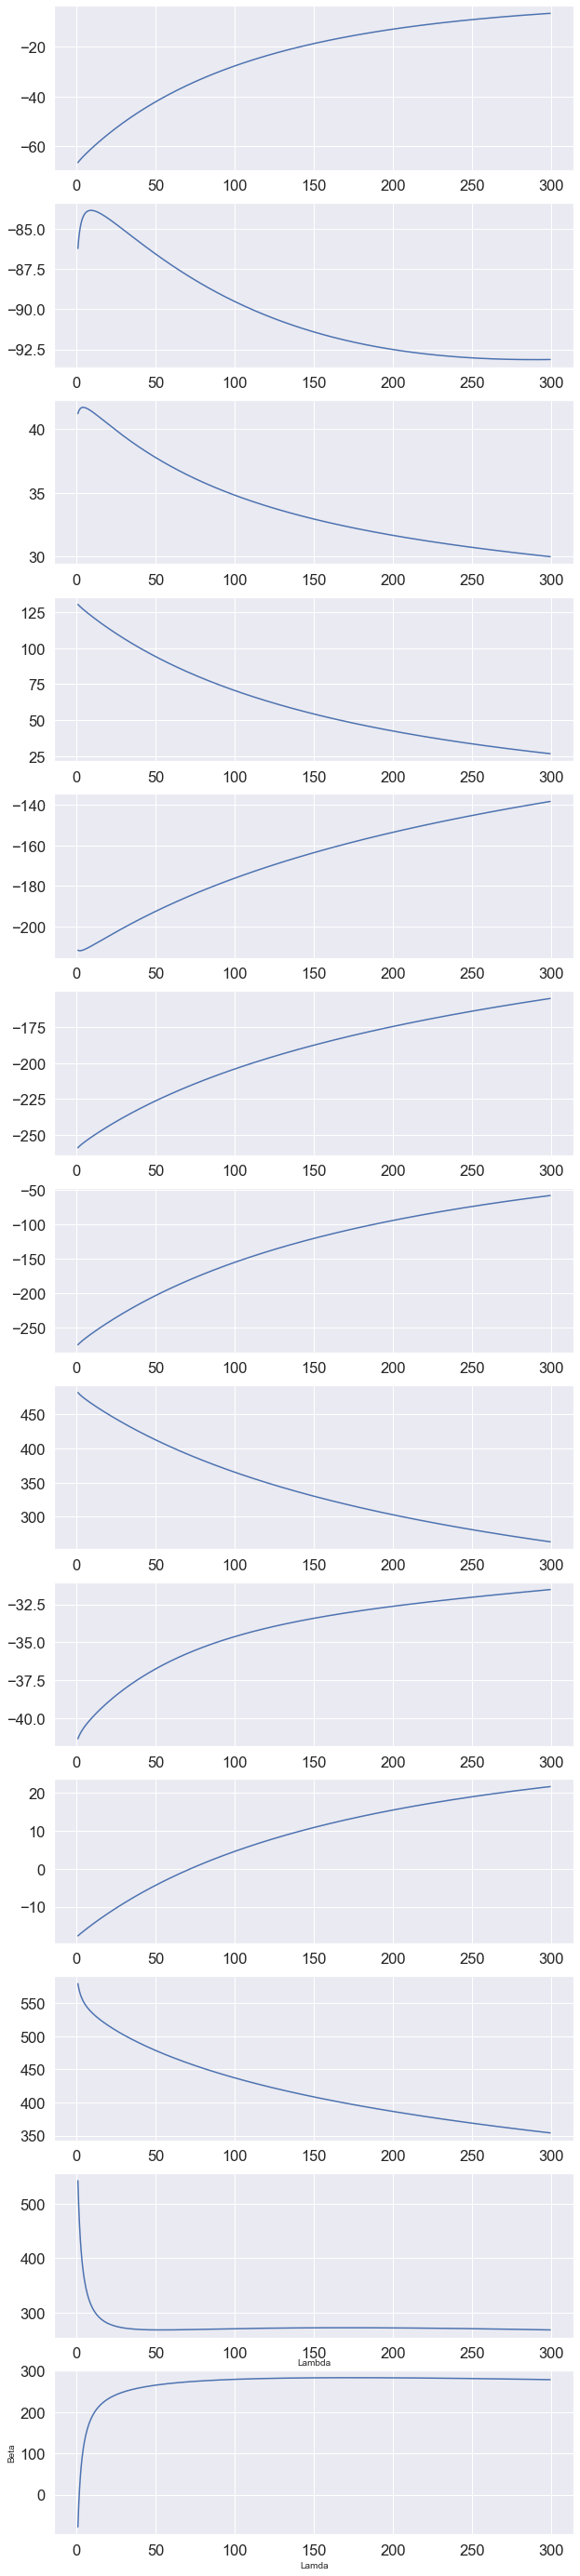

In [134]:

def plot_graph(alpha , n_col , n_iter ) : 
    result = RidgeRegression(X, y, n_iter, n_col, alpha)
    lamda = np.arange(1,n_iter,alpha)

    fig, axs = plt.subplots(n_col,figsize=(10,50))
    for i in range(n_col):
        axs[i].plot(lamda, result[i], label = 'beta' +str(i))
        plt.xlabel('Lamda', fontsize=10)
        plt.ylabel('Beta', fontsize=10)
        plt.title('Lambda', fontsize=10)
    
    plt.show()



plot_graph(alpha = 0.5,
           n_col = len(X.columns),
           n_iter = 300)
    

In [135]:
lamda = 30
x_t = np.transpose(X)
x_trans_x = np.dot(x_t, X)

identity_lambda = np.identity(x_trans_x.shape[0]) * lamda
inv = np.linalg.inv(identity_lambda + x_trans_x)
xtrans_y = np.dot(x_t, y)
betas = np.dot(inv, xtrans_y)

ridge_betas = pd.Series(betas, index =["PCI INDEX", "MKS_value","POP_value", "LAQU_value", "ENTRY_COST",  "LAND_ACCESS", "TRANSPARANCY", "TIME_COST", "INFORMAL_CHARGES", "PROACTIVITY", "BUSINESS_SUPPORT" , "LABOR_POLICY", "LAW"] )         
ridge_betas                                     

PCI INDEX           -50.318146
MKS_value           -85.062295
POP_value            39.447295
LAQU_value          106.731188
ENTRY_COST         -200.497889
LAND_ACCESS        -237.560251
TRANSPARANCY       -228.665679
TIME_COST           436.505607
INFORMAL_CHARGES    -38.090532
PROACTIVITY          -9.084374
BUSINESS_SUPPORT    502.000698
LABOR_POLICY        272.337643
LAW                 249.102156
dtype: float64

From the graph obtained above, we can generally say that Ridge Regression resulted in optimal output when the lamda value is between 0 and 50. Based on this, we used $\lambda$ value of 30 to come up with new $\beta$ values.
It showed that LABOR POLICY, BUSINESS SUPPORT, and PCI INDEX still has very high influence in FDI. This is a bit different from the result we obtained in just running regular Linear regression model.

# Conclusion

Results from OLS analysis showed that three features **(MKS, LAQU, LABOR_POLICY)** had a significant effect on **FDI** flow. In other words, it was confirmed that foreign companies consider important how large the market size of the region they want to invest in, how large the resident population (purchase power, labor force), and how local governments are trying to increase the proportion of high-quality labor in the region. However, when we used a ridge regression, only **LABOR POLICY** factor survived as an important feature in **FDI** flow. Recalling that most of Vietnam's industries are concentrated in the manufacturing industry, and many global companies that focus on the manufacturing industry use Vietnam as a major production base, the analysis results reflect reality to some extent.


# Room for Improvement

There are 3 things we could have done better in this data analysis. 

- **First, the amount of data is insufficient.** The data used in the model is data accumulated over the past decade in 63 provinces in Vietnam. Considering the fact that Vietnam has actively attracted FDI at the government level since 1986 and PCI data was measured since the early 1990s, the explanatory power of the model can be increased to some extent if the accumulated data can be added. 


- **Second is the reliability of PCI.** PCI data is data that quantifies and organizes the results obtained through surveys to 'entrepreneurs' operating in Vietnam. It is difficult to say that the reliability of the data itself is very high because these data are relatively lacking in objectivity, and there are many factors that may be affected, such as how to create survey contents and respondents' propensity. Therefore, if a separate feature that can quantify the feature in the administrative part of the local government is added, the objectivity of the feature can be further increased.


- **Third, Independence of factors.** Factors such as economic factors (market size, population, labor available population, labor quality) were not completely mutually independent factors. It was verified that there was a problem with multicollinearity through the VIF value. To measure the impact more accurately, if we could have added other economic factors such as electricity and water usage, traffic volume, land development index, etc that can affect the inflow of FDI, our model can be more confidence in explaining the result.